In [1]:
#%%
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
### This script is used to draw compared curves in ennergy model stduy...

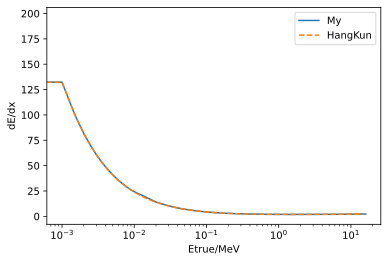

<ipython-input-30-a42edccf8e96>:43: RuntimeWarning: invalid value encountered in double_scalars
  xuvalue.append(accum/xunes[i+1])
<ipython-input-30-a42edccf8e96>:54: RuntimeWarning: invalid value encountered in double_scalars
  myvalue.append(accum/mynes[i+1])


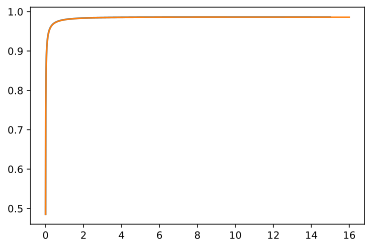

In [30]:
## ESTAR Stop Power compared...
myE, myP = [], []
with open("../data/electron/StopPower.txt") as f:
    for lines in f.readlines():
        line = lines.strip("\n")
        data = line.split(" ")
        myE.append(float(data[0]))
        myP.append(float(data[1]))

plt.plot(myE, myP, "-", label="My")

xuE, xuP = [], []
with open("../data/electron/ESTAR_GdLS.txt") as f:
    for lines in f.readlines():
        line = lines.strip("\n")
        data = line.split(" ")
        xuE.append(float(data[0]))
        xuP.append(float(data[3]))
plt.plot(xuE, xuP, "--", label="HangKun")

plt.legend()
plt.xlabel("Etrue/MeV")
plt.ylabel("dE/dx")
plt.semilogx()
plt.show()

import scipy.integrate as integrate
from scipy import interpolate

myE, myP = np.array(myE), np.array(myP)
xuE, xuP = np.array(xuE), np.array(xuP)
my_dedx = interpolate.interp1d(myE, myP)
xu_dedx = interpolate.interp1d(xuE, xuP)

def xuBirkFunc(es):
    return 1 / (1+0.0065*xu_dedx(es))

xunes = np.concatenate((np.array([0]), xuE), axis=0)
accum = 0
xuvalue = []
for i in range(len(xuE)):
    accum += integrate.quad(xuBirkFunc, xunes[i], xunes[i+1])[0]
    xuvalue.append(accum/xunes[i+1])
plt.plot(xuE, xuvalue, "-", label="Hangkun")

def myBirkFunc(es):
    return 1 / (1+0.0065*my_dedx(es))

mynes = np.concatenate((np.array([0]), myE), axis=0)
accum = 0
myvalue = []
for i in range(len(myE)):
    accum += integrate.quad(myBirkFunc, mynes[i], mynes[i+1])[0]
    myvalue.append(accum/mynes[i+1])

plt.plot(myE, myvalue, "-", label="My")

plt.show()